# Derivatives & Partial Derivatives — Complete Guide for ML Engineers

**Notebook goals**: Build rock-solid intuition and skill with derivatives, partials, gradients, chain rule, Jacobians/Hessians, and their use in optimization and backprop. Mirrors the style of your Vectors guide.

**You will learn**:
- What/Why: Derivatives as rates of change; partials as coordinate-wise rates
- How: Compute analytically and numerically; implement gradient descent
- Apply: To MSE, logistic loss, softmax cross-entropy; L1/L2 regularization
- Tools: Gradients, directional derivatives, Jacobian, Hessian, chain rule
- Practice: Visuals, exercises, interview prep, and a mini-project


## 0. How to use this notebook
1. Read the intuition sections first.
2. Run the code cells to see derivatives numerically.
3. Attempt the exercises before looking at the solutions at the end.
4. Use the cheat sheet as a quick reference.


## 1. Intuition: What is a derivative?
- **Single-variable derivative** $f'(x)$ is the instantaneous rate of change of $f$ with respect to $x$.
- Think of **slope of a tangent line** to the curve $y=f(x)$ at a point.
- In optimization, the derivative indicates **which way to move** to increase/decrease the function.

### Partial derivatives (multivariable)
- If $f$ depends on multiple variables, $f(x_1, x_2, \dots, x_n)$, a **partial derivative** $\partial f/\partial x_i$ measures the rate of change **holding all other variables fixed**.
- Collecting all partials gives the **gradient** $\nabla f = \left[\frac{\partial f}{\partial x_1},\dots,\frac{\partial f}{\partial x_n}\right]^\top$.


## 2. Single-variable derivatives: definition and rules
Definition:
$$ f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}. $$

Useful rules:
- Linearity: $(af+bg)' = af' + bg'$
- Product: $(fg)' = f'g + fg'$
- Quotient: $(f/g)' = (f'g - fg')/g^2$ (when $g\neq 0$)
- Chain: $(f\circ g)'(x) = f'(g(x))\cdot g'(x)$
- Common: $(x^n)'=nx^{n-1}$, $(e^x)'=e^x$, $(\ln x)'=1/x$, $(\sin x)'=\cos x$, $(\cos x)'=-\sin x$.


## 3. Numerical derivatives (finite differences)
We can approximate derivatives numerically using small steps.
- Forward difference: $f'(x) \approx \frac{f(x+h)-f(x)}{h}$
- Central difference (usually better): $f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$


In [1]:
import numpy as np

def f(x):
    return np.sin(x) + x**2

def forward_diff(f, x, h=1e-5):
    return (f(x+h) - f(x)) / h

def central_diff(f, x, h=1e-5):
    return (f(x+h) - f(x-h)) / (2*h)

x0 = 1.0
approx_fwd = forward_diff(f, x0)
approx_ctr = central_diff(f, x0)
true = np.cos(x0) + 2*x0
approx_fwd, approx_ctr, true

(np.float64(2.5403080985197946),
 np.float64(2.54030230586455),
 np.float64(2.5403023058681398))

## 4. Visual: slope as tangent
We'll visualize $f(x)$ and the tangent line at $x=x_0$.


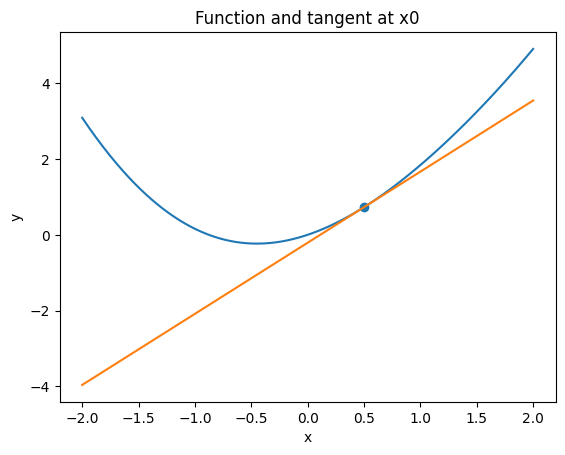

In [2]:
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 400)
y = f(x)
x0 = 0.5
m = central_diff(f, x0)
b = f(x0) - m*x0
y_tan = m*x + b

plt.figure()
plt.plot(x, y)
plt.plot(x, y_tan)
plt.scatter([x0], [f(x0)])
plt.title('Function and tangent at x0')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 5. Partial derivatives & the gradient
For $f(x,y) = x^2 y + \sin y$:
$$ \frac{\partial f}{\partial x} = 2xy, \qquad \frac{\partial f}{\partial y} = x^2 + \cos y. $$
The gradient vector is $\nabla f(x,y) = [2xy,\; x^2+\cos y]^\top$.

The **directional derivative** in direction unit vector $\hat{u}$ is $D_{\hat{u}} f = \nabla f \cdot \hat{u}$.


In [3]:
def f2(x, y):
    return x**2 * y + np.sin(y)

def grad_f2(x, y, h=1e-6):
    # numerical partials via central differences
    fx = (f2(x+h, y) - f2(x-h, y)) / (2*h)
    fy = (f2(x, y+h) - f2(x, y-h)) / (2*h)
    return np.array([fx, fy])

pt = (1.0, 0.5)
grad_f2(pt[0], pt[1])

array([1.        , 1.87758256])

## 6. Chain rule (scalar, vector, matrix forms)
- **Scalar chain rule**: If $y=g(x)$ and $z=f(y)$ then $\frac{dz}{dx} = \frac{dz}{dy}\cdot\frac{dy}{dx}$.
- **Vector chain rule** (Jacobian form): If $\mathbf{y}=\mathbf{g}(\mathbf{x})$ and $\mathbf{z}=\mathbf{f}(\mathbf{y})$ then the Jacobian $J_{\mathbf{z}}(\mathbf{x}) = J_{\mathbf{z}}(\mathbf{y}) \cdot J_{\mathbf{y}}(\mathbf{x})$.
- This underpins **backpropagation** in neural networks.


## 7. Jacobian and Hessian
- **Jacobian**: matrix of first-order partial derivatives; maps input changes to output changes for vector-valued functions.
- **Hessian**: matrix of second-order partials of a scalar function; encodes curvature, used in Newton/Quasi-Newton methods.

Example scalar function: $f(x,y)=x^2+2xy+3y^2$.
- $\nabla f = [2x+2y,\; 2x+6y]^\top$
- $H = \begin{bmatrix}2 & 2 \\ 2 & 6\end{bmatrix}$ (constant here)


## 8. Optimization & gradient descent
Gradient descent update: $\theta \leftarrow \theta - \eta\, \nabla_\theta \mathcal{L}(\theta)$.
- $\eta$ is the learning rate.
- The gradient points to the steepest **ascent**; we subtract it to **descend**.


In [4]:
def quadratic_loss(theta):
    # simple convex bowl: L = (theta-3)^2
    return (theta - 3.0)**2

def grad_quadratic_loss(theta):
    return 2.0*(theta - 3.0)

theta = 10.0
eta = 0.1
history = []
for _ in range(50):
    g = grad_quadratic_loss(theta)
    theta -= eta * g
    history.append((theta, quadratic_loss(theta)))
history[-5:]

[(3.000243914400609, 5.949423482434047e-08),
 (3.000195131520487, 3.807631028761257e-08),
 (3.00015610521639, 2.4368838584127502e-08),
 (3.000124884173112, 1.559605669388597e-08),
 (3.0000999073384897, 9.981476284104766e-09)]

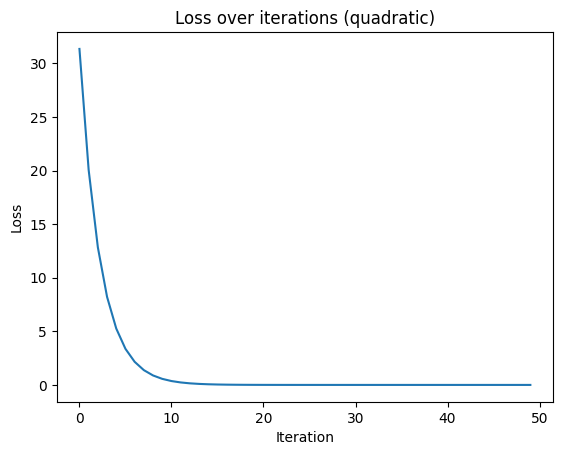

In [5]:
ts = np.array([t for t, _ in history])
ls = np.array([l for _, l in history])
import matplotlib.pyplot as plt
plt.figure()
plt.plot(ls)
plt.title('Loss over iterations (quadratic)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## 9. Core ML loss derivatives
### Mean Squared Error (MSE)
$$ \mathcal{L}(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - y_i)^2, \quad \hat{y}=X\mathbf{w}. $$
Gradient: $\nabla_\mathbf{w} \mathcal{L} = \frac{2}{N} X^\top (X\mathbf{w} - \mathbf{y}).$

### Logistic loss (binary)
$$ \mathcal{L}(\mathbf{w}) = -\frac{1}{N}\sum_i \big[ y_i\log \sigma(z_i) + (1-y_i)\log(1-\sigma(z_i)) \big],\; z=X\mathbf{w}.$$
With $\sigma(z)=1/(1+e^{-z})$, gradient: $\nabla_\mathbf{w} \mathcal{L} = \frac{1}{N} X^\top(\sigma(z)-\mathbf{y}).$

### Softmax cross-entropy (multiclass)
Let $Z = XW$ and $P=\text{softmax}(Z)$ row-wise. Loss $= -\frac{1}{N}\sum_i \log P_{i,y_i}$.
Gradient wrt $W$: $\nabla_W \mathcal{L} = \frac{1}{N} X^\top (P - Y)$ where $Y$ is one-hot.

### Regularization
- L2: add $\lambda\|\mathbf{w}\|_2^2$ → gradient adds $2\lambda\mathbf{w}$
- L1: add $\lambda\|\mathbf{w}\|_1$ → subgradient adds $\lambda\,\text{sign}(\mathbf{w})$ (at 0, any value in [-1,1])


## 10. Mini demo: Logistic regression from scratch (gradient descent)
We'll fit a tiny 2D dataset.


In [6]:
rng = np.random.default_rng(0)
N = 200
X = rng.normal(size=(N, 2))
true_w = np.array([1.5, -2.0])
logits = X @ true_w + 0.2*rng.normal(size=N)
y = (logits > 0).astype(int)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def logistic_loss_and_grad(w, X, y):
    z = X @ w
    p = sigmoid(z)
    # add small epsilon for stability
    eps = 1e-12
    loss = -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))
    grad = (X.T @ (p - y)) / X.shape[0]
    return loss, grad

w = np.zeros(2)
eta = 0.5
loss_hist = []
for _ in range(200):
    loss, grad = logistic_loss_and_grad(w, X, y)
    w -= eta * grad
    loss_hist.append(loss)
w, loss_hist[-1]

(array([ 3.33620131, -4.28688005]), np.float64(0.1198382750310885))

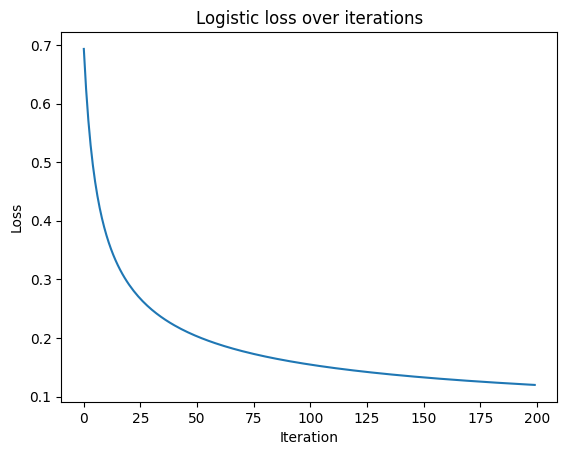

In [7]:
plt.figure()
plt.plot(loss_hist)
plt.title('Logistic loss over iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## 11. Gradient checking
Compare analytical gradient with numerical central-difference gradient to catch bugs.


In [8]:
def num_grad(fun, w, eps=1e-5):
    g = np.zeros_like(w)
    for i in range(len(w)):
        e = np.zeros_like(w)
        e[i] = eps
        g[i] = (fun(w+e) - fun(w-e)) / (2*eps)
    return g

def loss_only(w):
    return logistic_loss_and_grad(w, X, y)[0]

w_test = rng.normal(size=2)
_, g_true = logistic_loss_and_grad(w_test, X, y)
g_num = num_grad(loss_only, w_test)
np.vstack([g_true, g_num])

array([[-0.41995144,  0.07090299],
       [-0.41995144,  0.07090299]])

## 12. Common pitfalls & debugging tips
- Using too large a step $h$ for finite differences → poor approximations.
- Forgetting to **hold other variables constant** when taking partials.
- Ignoring scaling/normalization → gradients explode/vanish.
- Not checking gradient signs (ascending vs descending).
- Numerical overflow in sigmoid / log; always add eps or use stable forms.


## 13. Interview perspective
**Concepts**
- Explain derivative vs partial derivative vs gradient.
- Derive MSE gradient for linear regression.
- Show chain rule in a 2-layer network.
- Describe when Hessians are useful.

**Coding**
- Implement numerical gradient checker.
- Fit logistic regression with gradient descent.


## 14. Mini projects
1. **Linear regression from scratch** with closed-form vs gradient descent; compare convergence.
2. **2D contour descent**: visualize gradient descent path on a banana-shaped function (e.g., Rosenbrock).
3. **Regularized logistic regression**: add L1/L2 and observe weight shrinkage.


## 15. Cheat sheet
- Gradient: $\nabla f(\mathbf{x}) = [\partial f/\partial x_1, \dots, \partial f/\partial x_n]^\top$
- Directional derivative: $D_{\hat{u}} f = \nabla f \cdot \hat{u}$
- Chain rule: $J_{z}(x) = J_{z}(y) J_{y}(x)$ (Jacobian form)
- Hessian: $H_{ij} = \partial^2 f/\partial x_i\partial x_j$
- Logistic gradient: $\nabla_w = X^\top(\sigma(Xw) - y)/N$
- MSE gradient: $\nabla_w = 2 X^\top(Xw - y)/N$


## 16. Exercises (try first!)
1. **Partials**: For $f(x,y)=\exp(xy)$, compute $\partial f/\partial x$ and $\partial f/\partial y$.
2. **Gradient**: For $f(x,y)=x^2+xy+y^2$, compute $\nabla f$ and find the critical point.
3. **Chain rule**: If $g(x,y)=x+y$ and $f(u)=u^3$, compute $\partial (f\circ g)/\partial x$ and w.r.t. $y$ at $(1,2)$.
4. **Numerical vs analytical**: Implement central-difference gradient for MSE and compare to analytical.


## 17. Exercise solutions
**1.** $f=\exp(xy)$ → $\partial f/\partial x = y\exp(xy)$, $\partial f/\partial y = x\exp(xy)$.

**2.** $\nabla f = [2x + y, x + 2y]^\top$. Critical point solves $2x+y=0$ and $x+2y=0$ → $(0,0)$.

**3.** $h(x,y)=(x+y)^3$. $\partial h/\partial x = 3(x+y)^2$, same for $y$. At $(1,2)$: $3\cdot 3^2=27$.

**4.** See earlier MSE gradient formula; implement and verify with central differences.


## 18. Backpropagation sketch (bonus)
Backprop applies the chain rule layer-by-layer to compute gradients efficiently. For a simple 2-layer MLP with ReLU and softmax, you can derive $\partial \mathcal{L}/\partial W$ and $\partial \mathcal{L}/\partial b$ by propagating gradients from output to input.
